In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [2]:
# 한글 폰트 문제 해결
# matplotlib는 한글 폰트를 지원하지 않음
# os정보
import platform
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# Unicode 설정
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print("Unknown System")

In [3]:
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n{}".format(clusters))


클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0, 0.5, '특성 1')

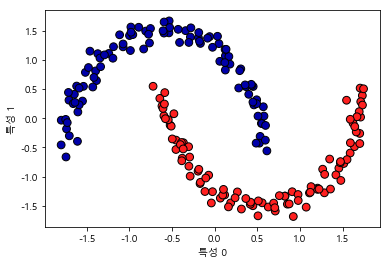

In [4]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [5]:
test_song = pd.read_csv('./data/SpotifyAudioFeatures2000.csv')
test_song.drop(columns=['Unnamed: 0'],inplace=True)
test_song.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,0.865,0.000011,11,0.1680,-5.708,0,0.0286,99.010,4,0.543
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,0.665,0.000000,5,0.0453,-4.286,0,0.0610,104.504,4,0.760
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,0.805,0.000000,4,0.0771,-5.946,0,0.2690,94.946,4,0.615
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,0.661,0.000130,11,0.2340,-7.227,1,0.0281,173.365,4,0.285


In [6]:
test_song.iloc[:,[3,7,8,9,10,11,12,13,14,15,16,17,18,19]].head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,83,0.01030,0.542,216933,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
1,78,0.00664,0.545,233933,0.865,0.000011,11,0.1680,-5.708,0,0.0286,99.010,4,0.543
2,78,0.03390,0.950,284200,0.665,0.000000,5,0.0453,-4.286,0,0.0610,104.504,4,0.760
3,77,0.14200,0.843,270507,0.805,0.000000,4,0.0771,-5.946,0,0.2690,94.946,4,0.615
4,81,0.00239,0.429,266773,0.661,0.000130,11,0.2340,-7.227,1,0.0281,173.365,4,0.285


In [7]:
# testlists = np.log1p(test_song.iloc[:,1:])
# testlists.isnull().sum()

In [8]:
# testlists.dropna(inplace=True)
# testlists.isnull().sum()

In [9]:
testlists = test_song.iloc[:,[3,7,8,9,10,11,12,13,14,15,16,17,18,19]].values
testlists

array([[8.30000e+01, 1.03000e-02, 5.42000e-01, ..., 1.05256e+02,
        4.00000e+00, 3.70000e-01],
       [7.80000e+01, 6.64000e-03, 5.45000e-01, ..., 9.90100e+01,
        4.00000e+00, 5.43000e-01],
       [7.80000e+01, 3.39000e-02, 9.50000e-01, ..., 1.04504e+02,
        4.00000e+00, 7.60000e-01],
       ...,
       [1.60000e+01, 9.45000e-01, 4.00000e-01, ..., 1.05966e+02,
        1.00000e+00, 1.87000e-01],
       [1.60000e+01, 9.58000e-01, 3.00000e-01, ..., 7.63120e+01,
        1.00000e+00, 2.20000e-01],
       [2.20000e+01, 9.74000e-01, 2.10000e-01, ..., 8.65450e+01,
        4.00000e+00, 3.88000e-02]])

In [10]:
# testlists = test_song.iloc[:,[7,10]].values
# testlists

In [11]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(testlists)
print("클러스터 레이블:\n{}".format(clusters))


클러스터 레이블:
[-1 -1 -1 ... -1 -1 -1]


In [12]:
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(testlists)
X_scaled = scaler.transform(testlists)
np.unique(X_scaled)


array([-7.15456956, -7.14547753, -7.04910198, ..., 13.21588042,
       14.00770373, 14.18683654])

Text(0, 0.5, '특성 1')

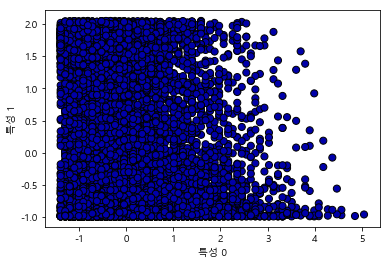

In [13]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=50, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(testlists)
X_scaled = scaler.transform(testlists)
np.unique(X_scaled)

array([0.00000000e+00, 6.02410358e-08, 1.70682935e-07, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

Text(0, 0.5, '특성 1')

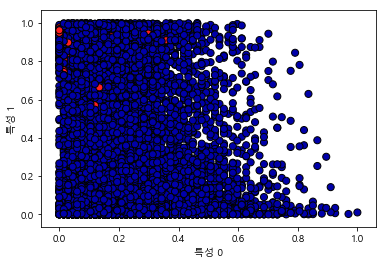

In [16]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=50, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## ------------------------------------------------------------------------------------------------------------------------------
## 사용하지 못한 이유
밀도기반의 군집기법이라서 데이터가 모든구간에 밀집되어 있어서     
군집이 나뉘지 않는 문제가 나타남.     

따라서 군집을 나눌 수 없으므로 다른 방식을 적용.    